<a href="https://colab.research.google.com/github/valerymamontov/colab_notebooks/blob/main/Maps_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Работа с картами

Используются открытые данные по округам Москвы и библиотеки matplotlib, geopandas.

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 4.9MB/s 
     |████████████████████████████████| 14.7MB 238kB/s 
     |████████████████████████████████| 10.9MB 25.7MB/s 


In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes

# работа с картографическими данными построена вокруг координат и 
# полигонов, которые соотнесены с этими координатами

# сначала загружается карта, представленная в виде полигонов
# для этого обычно используют формат geo-json

data = gpd.read_file("https://video.ittensive.com/python-advanced/moscow.json")
data

,NAME,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,geometry
0,Киевский,45298555,45945000,Троицкий,45298000,Троицкий,Поселение,"MULTIPOLYGON (((36.80310 55.44083, 36.80319 55..."
1,Филёвский Парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.42765 55.74821, 37.42849 55.74875..."
2,Новофёдоровское,45298567,45954000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.80357 55.45162, 36.80451 55.46551..."
3,Роговское,45298575,45956000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.93724 55.24139, 36.93726 55.24161..."
4,"""Мосрентген""",45297568,45953000,Новомосковский,45297000,Новомосковский,Поселение,"POLYGON ((37.43956 55.62731, 37.44018 55.63042..."
...,...,...,...,...,...,...,...,...
141,Ивановское,45263567,45306000,Восточный,45263000,ВАО,Муниципальный округ,"POLYGON ((37.79981 55.76232, 37.79981 55.76243..."
142,Косино-Ухтомский,45263573,45308000,Восточный,45263000,ВАО,Муниципальный округ,"POLYGON ((37.83602 55.70978, 37.83620 55.71008..."
143,Новокосино,45263579,45310000,Восточный,45263000,ВАО,Муниципальный округ,"POLYGON ((37.84042 55.73049, 37.84063 55.73196..."
144,Некрасовка,45290574,45391000,Юго-Восточный,45290000,ЮВАО,Муниципальный округ,"POLYGON ((37.90613 55.70626, 37.90701 55.70699..."


In [ ]:
# видно, что в наборе присутствует серия данных "geometry"
# внутри неё содержатся полигоны с координатами объектов
# полигон состоит из наборов точек, каждая точка состоит из двух координат
# точки соединяются в отрезки, два и более отрезка соединяются в кривые
# и полигон предствляет собой замкнутую линию из отрезков

# мультиполигон состоит из нескольких полигонов

# после загрузки данных приведём координаты к проекции Меркартор
# она наиболее распространённая проекция

data = data.to_crs({'init' : 'epsg:3857'})
data

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,NAME,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,geometry
0,Киевский,45298555,45945000,Троицкий,45298000,Троицкий,Поселение,"MULTIPOLYGON (((4096902.352 7447896.604, 40969..."
1,Филёвский Парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((4166426.940 7508453.808, 4166520.448..."
2,Новофёдоровское,45298567,45954000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((4096954.672 7450014.341, 4097059.312..."
3,Роговское,45298575,45956000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((4111834.748 7408856.639, 4111836.974..."
4,"""Мосрентген""",45297568,45953000,Новомосковский,45297000,Новомосковский,Поселение,"POLYGON ((4167752.755 7484578.556, 4167821.773..."
...,...,...,...,...,...,...,...,...
141,Ивановское,45263567,45306000,Восточный,45263000,ВАО,Муниципальный округ,"POLYGON ((4207855.601 7511245.059, 4207855.601..."
142,Косино-Ухтомский,45263573,45308000,Восточный,45263000,ВАО,Муниципальный округ,"POLYGON ((4211886.480 7500856.670, 4211906.518..."
143,Новокосино,45263579,45310000,Восточный,45263000,ВАО,Муниципальный округ,"POLYGON ((4212376.286 7504949.853, 4212399.663..."
144,Некрасовка,45290574,45391000,Юго-Восточный,45290000,ЮВАО,Муниципальный округ,"POLYGON ((4219691.090 7500161.183, 4219789.051..."


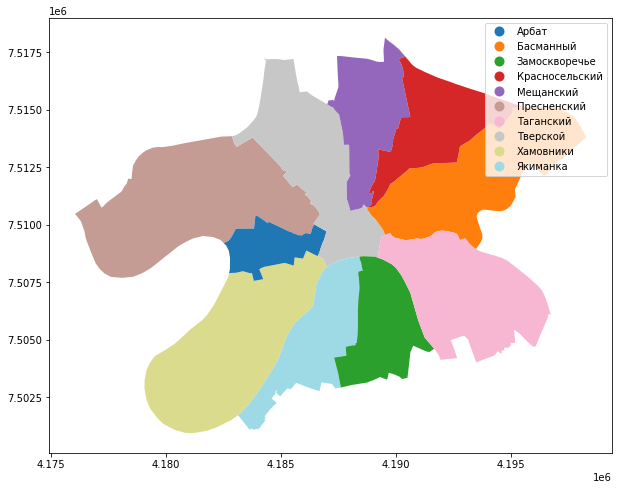

In [ ]:
fig = plt.figure(figsize=(12, 8))
area = plt.subplot(1, 1, 1)
data[data["NAME_AO"] == "Центральный"].plot(ax=area, legend=True,
                                            column="NAME", cmap="tab20")
plt.show()
# cmap - это цветовая схема

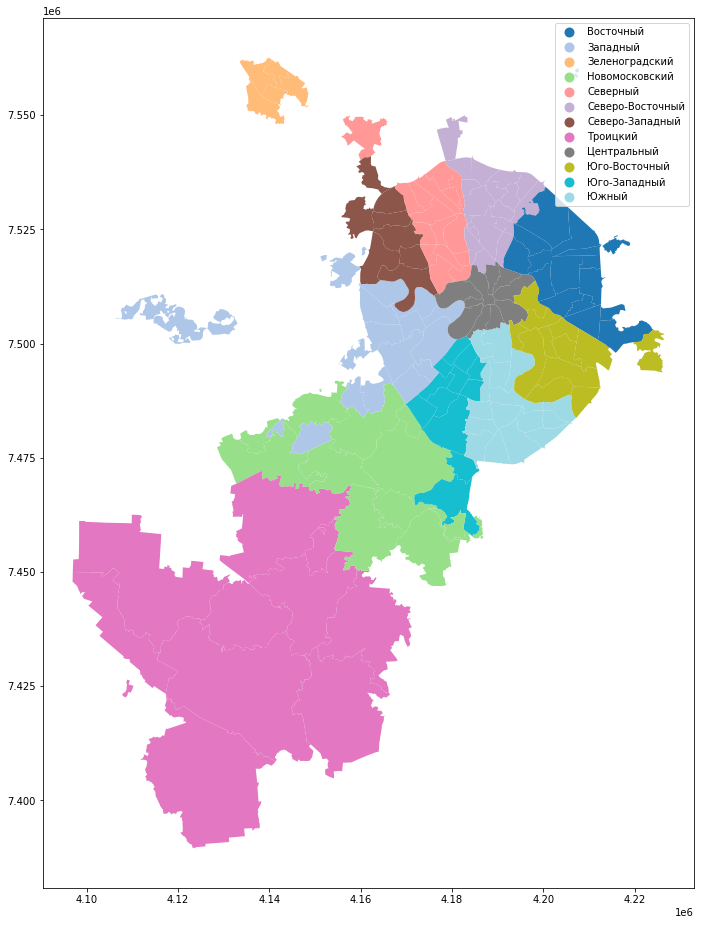

In [ ]:
fig = plt.figure(figsize=(20, 16))
area = plt.subplot(1, 1, 1)
data.plot(ax=area, legend=True, column="NAME_AO", cmap="tab20")
plt.show()